# Z-score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
sns.set()

In [12]:
rg = np.random.default_rng(42)
true = np.concatenate([
    .6*rg.random(20)+.2,
])
pred = true + np.concatenate([
    rg.normal(0, .05, 20),
])
df = pd.DataFrame(
    {
        'pred': np.clip(pred, 0, 1),
        'true': true,
        'z': zscore(true)
    }
).sort_values('true').reset_index(drop=True).rename_axis(index='decoy_id')
df

,pred,true,z
decoy_id,,,
0,0.196283,0.238290,-1.839087
1,0.235090,0.256506,-1.729612
2,0.297505,0.276868,-1.607242
3,0.392792,0.336343,-1.249809
4,0.529561,0.422479,-0.732152
5,0.429281,0.463327,-0.486663
6,0.496847,0.466049,-0.470307
7,0.491773,0.470232,-0.445168
8,0.527053,0.532751,-0.069440


In [13]:
rg = np.random.default_rng(42)
true = np.concatenate([
    .6*rg.random(50)+.2,
    .6*rg.random(50)+.2,
    .2*rg.random(50)+.2,
    .2*rg.random(50)+.6,
])
pred = true + np.concatenate([
    rg.normal(0, .05, 50),
    rg.normal(0, .15, 50),
    rg.normal(0, .1, 50),
    rg.normal(0, .1, 50),
])
df = pd.DataFrame(
    {
        'pred': np.clip(pred, 0, 1),
        'true': true,
    }, 
    index=pd.MultiIndex.from_product([list('ABCD'), np.arange(50)], names=['target_id', 'decoy_id'])
)
df['z'] = df.groupby('target_id').apply(lambda df_t: pd.DataFrame({'z':zscore(df_t['true'])}))
df

pred      true         z
target_id decoy_id                              
A         0         0.696540  0.664374  0.859217
          1         0.443597  0.463327 -0.346800
          2         0.714903  0.715159  1.163861
          3         0.610249  0.618421  0.583560
          4         0.273385  0.256506 -1.587454
...                      ...       ...       ...
D         45        0.641289  0.635854 -1.117088
          46        0.672699  0.719877  0.259502
          47        0.820851  0.774912  1.161183
          48        0.709482  0.639287 -1.060839
          49        0.675889  0.662065 -0.687659

[200 rows x 3 columns]

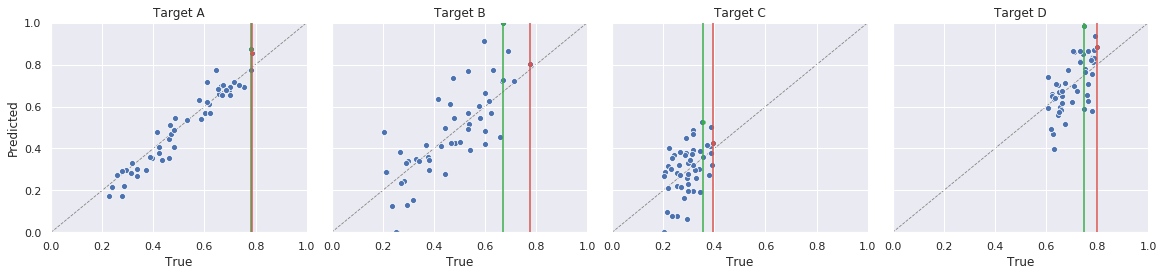

In [14]:
facetgrid = sns.relplot(
    x="true",
    y="pred",
    data=df.reset_index(),
    col="target_id",
    col_wrap=6,
    height=4,
    aspect=1.0,
)


def draw_best(true, pred, **kwargs):
    best_predicted = pred.idxmax()
    plt.axvline(
        true.loc[best_predicted],
        c=sns.xkcd_rgb["medium green"],
        linewidth=1.5,
        zorder=20,
    )
    plt.scatter(
        true.loc[best_predicted],
        pred.loc[best_predicted],
        c=sns.xkcd_rgb["medium green"],
        s=42,
        marker=".",
        zorder=21,
    )

    best_true = true.idxmax()
    plt.axvline(
        true.loc[best_true], c=sns.xkcd_rgb["pale red"], linewidth=1.5, zorder=30
    )
    plt.scatter(
        true.loc[best_true],
        pred.loc[best_true],
        c=sns.xkcd_rgb["pale red"],
        s=42,
        marker=".",
        zorder=31,
    )


facetgrid.map(draw_best, "true", "pred")
facetgrid.set_titles("Target {col_name}")
facetgrid.set_xlabels("True")
facetgrid.set_ylabels("Predicted")

for ax in facetgrid.axes:
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=0.8, zorder=0)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

,pred,true,z
target_id,,,
A,0.874348,0.780506,1.555858
B,1.000000,0.672155,1.353942
C,0.528485,0.355750,1.084906
D,0.982487,0.749722,0.748469


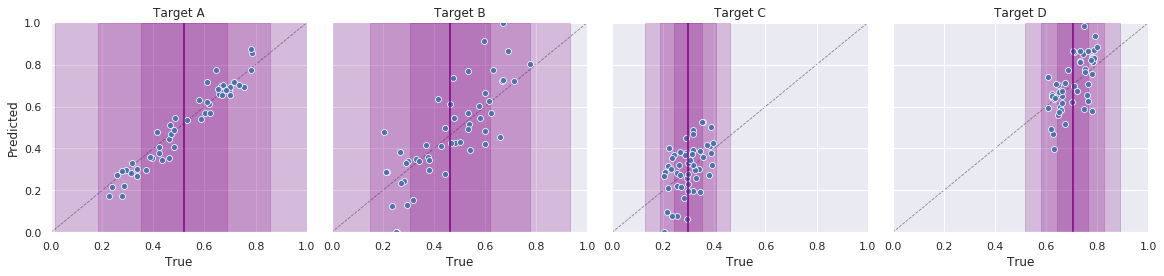

In [15]:
facetgrid = sns.relplot(
    x="true",
    y="pred",
    data=df.reset_index(),
    col="target_id",
    col_wrap=6,
    height=4,
    aspect=1.0,
    zorder=2
)
    
facetgrid.set_titles("Target {col_name}")
facetgrid.set_xlabels("True")
facetgrid.set_ylabels("Predicted")

for ax, (_, df_t) in zip(facetgrid.axes, facetgrid.facet_data()):
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=0.8, zorder=0)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    m = df_t['true'].mean()
    s = df_t['true'].std()
    ax.axvline(m, c='purple')
    for z in [1,2,3]:
        ax.axvspan(m-z*s, m+z*s, alpha=.2, color='purple', zorder=1)

df.groupby('target_id').apply(lambda df_t: df_t.loc[df_t['pred'].idxmax()])